# DATA GATHERING

In [1]:
#import libraries to be use
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#getting the historical data of the company
df=web.DataReader("BPHLF", data_source='yahoo',start="2020-01-01",end="2022-10-10")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,1.68,1.68,1.68,1.68,0.0,0.054555
2020-01-02,1.68,1.68,1.68,1.68,0.0,0.054555
2020-01-03,1.68,1.68,1.68,1.68,0.0,0.054555
2020-01-06,1.68,1.68,1.68,1.68,0.0,0.054555
2020-01-07,1.68,1.68,1.68,1.68,0.0,0.054555
...,...,...,...,...,...,...
2022-10-04,1.66,1.66,1.66,1.66,100.0,1.660000
2022-10-05,1.66,1.66,1.66,1.66,0.0,1.660000
2022-10-06,1.66,1.66,1.66,1.66,0.0,1.660000


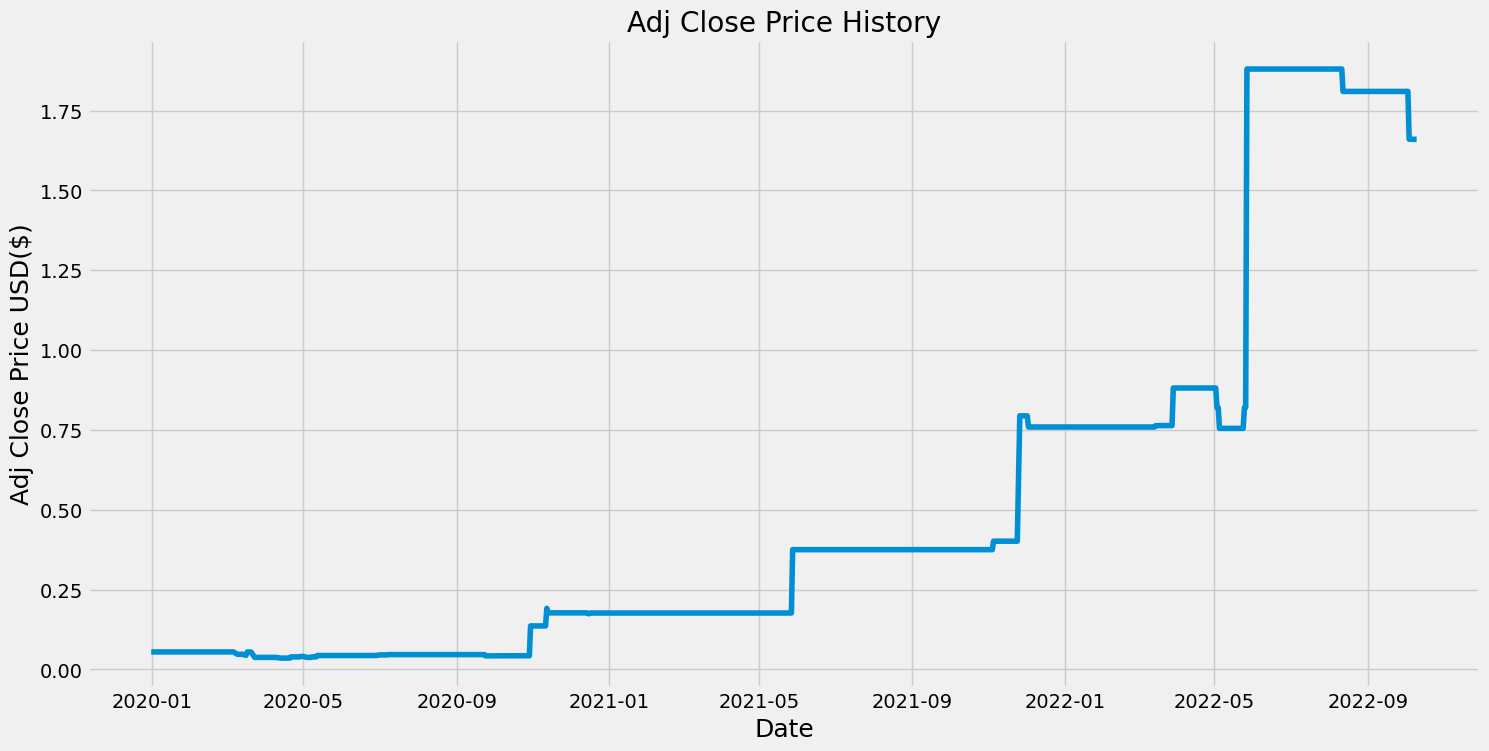

In [3]:
#visualize historical data  for the adjusted close value
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close Price USD($)',fontsize=18)
plt.show()

# Preprocessing the Data 

In [4]:
#storing adj close column to a new dataframe
data=df.filter(['Adj Close']) 
dataset=data.values

#splitting the data frame into 80% dataset and 20% for testing dataset
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

560

In [5]:
#scaling the data to be in range of 0 to 1 for fast processing
scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.01056082],
       [0.00651251],
       [0.006

In [6]:
#create training data set (80% training size)
train_data = scaled_data[0:training_data_len,:]


In [7]:
#split data to x_train and y_train

#creating empty list
x_train=[]
y_train=[]


#Looping to store the past 60 days in training data
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    #display how the data looks like (lists)
    if i<=61:
        print(x_train)
        print()
        print(y_train)
        print()


[array([0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.00651251, 0.00651251, 0.00651251, 0.00651251,
       0.00651251, 0.00475237, 0.01038481, 0.01038481, 0.01038481,
       0.01038481, 0.0012321 , 0.0012321 , 0.0012321 , 0.0012321 ])]

[0.0012320969173356712]

[array([0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.01056082, 0.01056082, 0.01056082, 0.01056082,
       0.01056082, 0.01056082, 0

In [8]:
#convert the x_train and y_train to numpy arrays
x_train, y_train= np.array(x_train), np.array(y_train)

In [9]:
#reshape the data to 3 dimensional since the LSTM expect to get 3d values

x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(500, 60, 1)

# Creating model for the data

In [10]:
#model architecture LSTM 

model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [11]:
#compiling the model created
model.compile(optimizer='adam',loss='mean_squared_error')


# Training the Model using the training data

In [12]:
#fitting the model 
model.fit(x_train,y_train, batch_size=1, epochs=1)


500/500 [==============================] - 25s 36ms/step - loss: 0.0011


In [13]:
#create the testing dataset
test_data=scaled_data[training_data_len-60:,:]
#test variablees
x_test=[]
y_test=dataset[training_data_len,:]

#storing the data for the past 60 days
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [14]:
#converting the testing data to array 
x_test = np.array(x_test)

#displaying the data have a grasp how it is looks like
x_test

array([[0.3923539 , 0.3923539 , 0.3923539 , ..., 0.39471808, 0.39471808,
        0.39471808],
       [0.3923539 , 0.3923539 , 0.3923539 , ..., 0.39471808, 0.39471808,
        0.39471808],
       [0.3923539 , 0.3923539 , 0.3923539 , ..., 0.39471808, 0.39471808,
        0.39471808],
       ...,
       [1.        , 1.        , 1.        , ..., 0.96200398, 0.88075419,
        0.88075419],
       [1.        , 1.        , 1.        , ..., 0.88075419, 0.88075419,
        0.88075419],
       [1.        , 1.        , 1.        , ..., 0.88075419, 0.88075419,
        0.88075419]])

In [15]:
#reshaping the test data to 3 dimensional array
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))


In [16]:
#predicting the test data using the model
predictions=model.predict(x_test)

#undoing the scaling / revert to the original value
predictions=scaler.inverse_transform(predictions)


5/5 [==============================] - 2s 28ms/step


# Model Evaluation (comparison of the validation and tested data)

In [17]:
#checking the root means square error 
rmse=np.sqrt(np.mean(predictions - y_test)**2 )

#checking what is the value of the rmse
rmse

0.6186895940984999

C:\Users\hp\AppData\Local\Temp\ipykernel_8392\3755696554.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


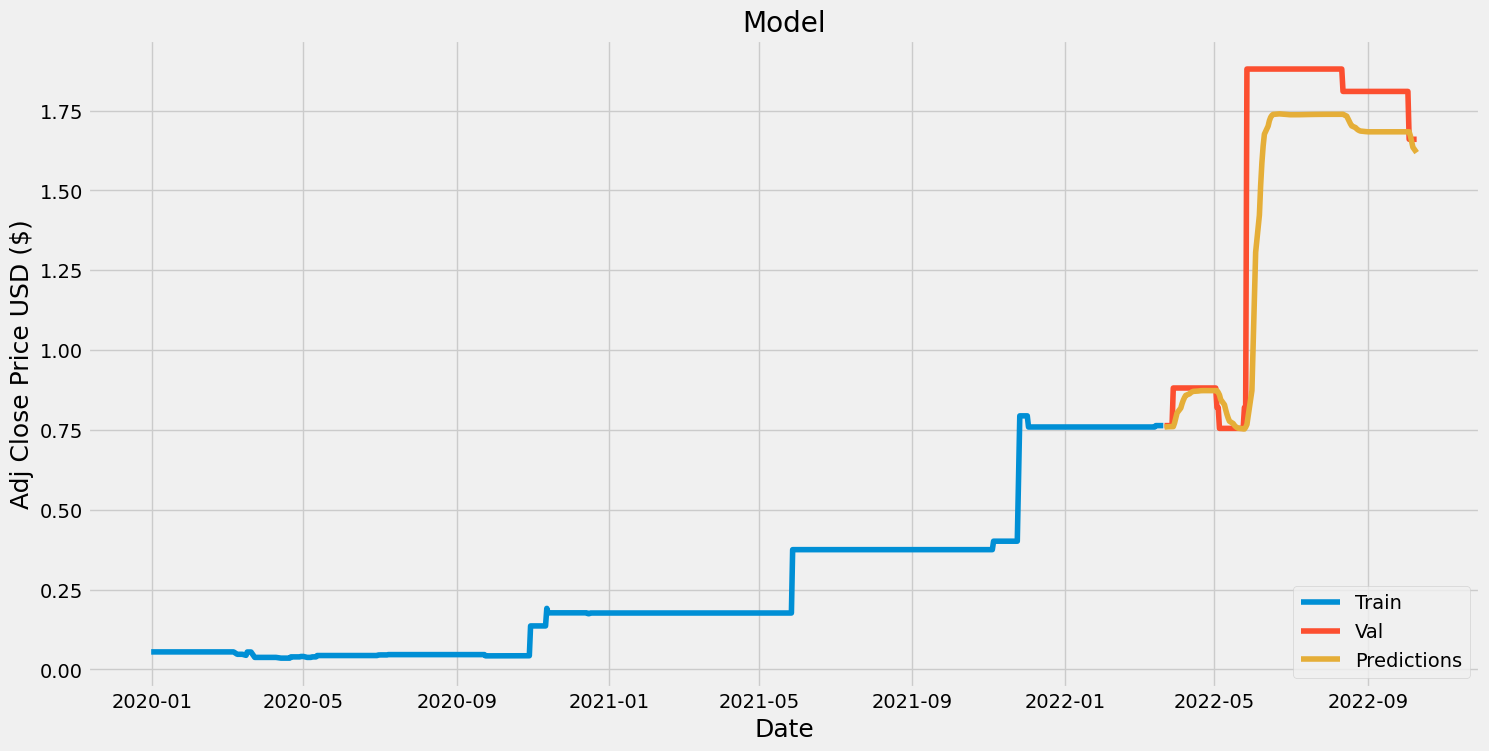

In [18]:
#plotting the traindata,validation data, prediction data 


train= data[:training_data_len]
valid= data[training_data_len:]
valid['Predictions']= predictions

#visualization of data
plt.figure(figsize=(16,8))

plt.title("Model")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train','Val', 'Predictions'],loc="lower right")
plt.show()





In [19]:
#show model predictions with actual value
print("Actual value of the training with the predictions")
valid
#we can see that the predictions are close to each other


Actual value of the training with the predictions


,Adj Close,Predictions
Date,,
2022-03-22,0.763298,0.758850
2022-03-23,0.763298,0.759260
2022-03-24,0.763298,0.759586
2022-03-25,0.763298,0.759837
2022-03-28,0.763298,0.760024
...,...,...
2022-10-04,1.660000,1.683448
2022-10-05,1.660000,1.670459
2022-10-06,1.660000,1.653014


# Tuning the data parameters and prediction in one loop

In [20]:
#OCTOBER 8-19 PREDICTION

#storing the same dataset in a variable for prediction
dataset= web.DataReader("BPHLF", data_source='yahoo',start="2020-01-01",end="2022-10-07")

#create new dataframe for the adjusted close value for basis of data
new_df=dataset.filter(['Adj Close'])

#creating empty data frame for storing the predicted value
predtotal=pd.DataFrame({})

#creating loop to reitirate 12 times of predicting values, starting to october 8- 19 prediction
for i in range (12):

    #storing the last 60 days of value and replacing the oldest value with the newest prediction
    last_60_days=new_df[-60+i:].append(predtotal).values
    
    #scaling the value for faster processing 
    last_60_days_scaled = scaler.transform(last_60_days)
    
    #create empty list to store the 60days of data
    X_test=[]
    
    #append/storing the  60 days amount of data
    X_test.append(last_60_days_scaled)
    
    #converting to array
    X_test=np.array(X_test)
    
    #reshaping to be 3d array to be fitted in the model
    X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    
    #prediction of the value
    pred_price=model.predict(X_test)
    
    #undo scaling 
    predprice=scaler.inverse_transform(pred_price)
    
    #storing the predicted value to compile for later
    predprice= pd.DataFrame({"Adj Close":predprice[0]})
    predtotal=predtotal.append(predprice)                         

#checking the predicted value
predtotal

1/1 [==============================] - 0s 46ms/step


C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values


1/1 [==============================] - 0s 48ms/step


C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values


1/1 [==============================] - ETA: 0s

C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values


1/1 [==============================] - 0s 42ms/step


C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values


1/1 [==============================] - ETA: 0s

C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values


1/1 [==============================] - ETA: 0s

C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)
C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  last_60_days=new_df[-60+i:].append(predtotal).values


1/1 [==============================] - 0s 44ms/step


C:\Users\hp\AppData\Local\Temp\ipykernel_8392\226570123.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predtotal=predtotal.append(predprice)


,Adj Close
0,1.618343
0,1.600502
0,1.582493
0,1.564705
0,1.547341
0,1.530496
0,1.514207
0,1.498479
0,1.483301
0,1.468654


# Result of the Predictions with Table and Figure

In [21]:
#changing the index to corresponding date 
predtotal.index=pd.date_range("20221008", periods=12)

#checking the output to have an idea how it is looks like
print("Prediction starting to October 8 - October 19")
predtotal


Prediction starting to October 8 - October 19


,Adj Close
2022-10-08,1.618343
2022-10-09,1.600502
2022-10-10,1.582493
2022-10-11,1.564705
2022-10-12,1.547341
2022-10-13,1.530496
2022-10-14,1.514207
2022-10-15,1.498479
2022-10-16,1.483301
2022-10-17,1.468654


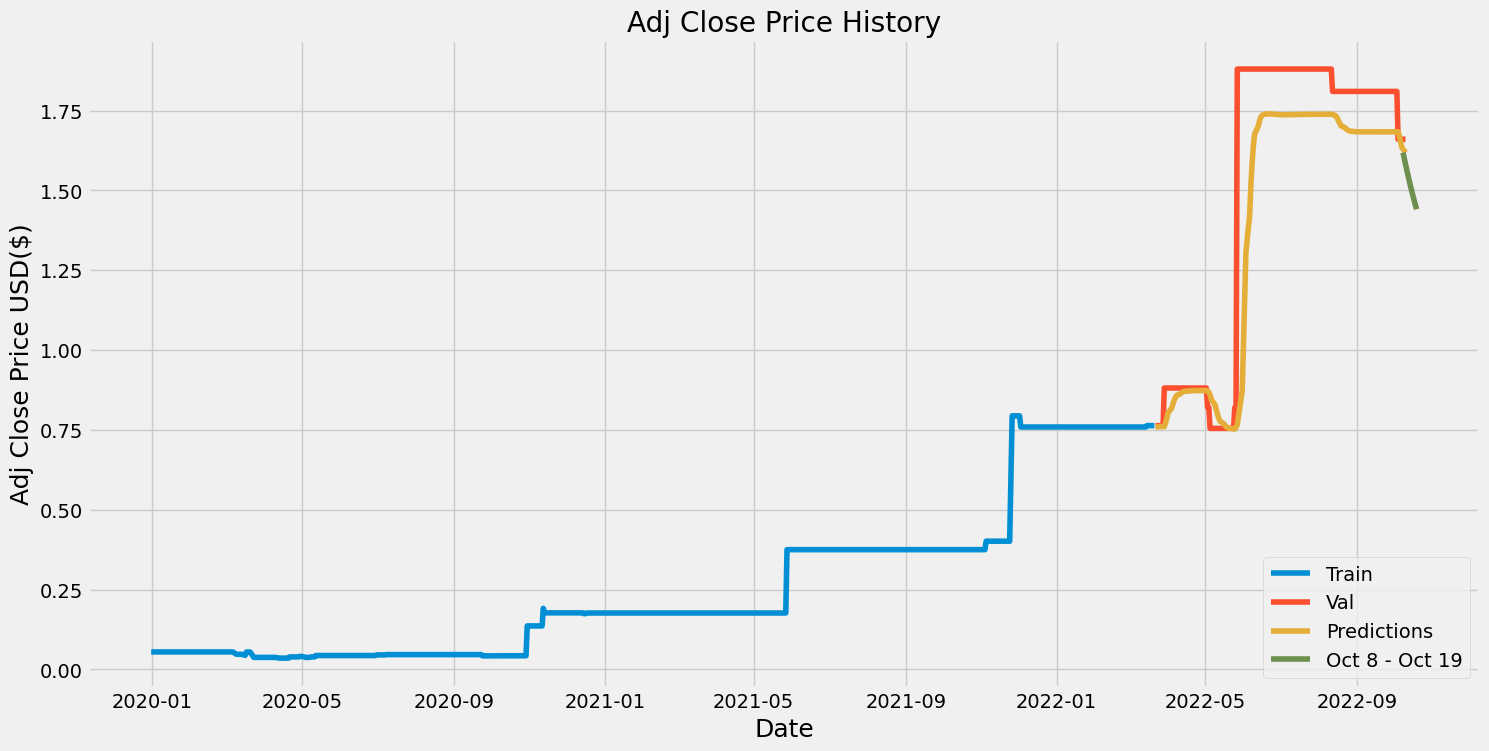

In [22]:
#combining all the graph in one figure with the predictions, training data, test data and validation 

plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close Price USD($)',fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.plot(predtotal)

plt.legend(['Train','Val', 'Predictions','Oct 8 - Oct 19'],loc="lower right")



In [23]:
#Puyatan is life 